In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import os
import ast

dataset = load_dataset("csv",data_files=os.path.join(os.path.abspath(os.path.join(os.getcwd(),"..")),"data_jobs.csv"))
df = dataset['train'].to_pandas()

df["job_posted_date"]= pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

In [3]:
df =df[df["job_title_short"] == "Data Analyst"]

In [4]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}"


In [5]:
df_exploded = df.explode("job_skills")

In [6]:
skill_stats = df_exploded.groupby("job_skills").agg(
    skill_count  = ("job_skills","count"),
    median_salary = ("salary_year_avg","median")
)

In [9]:
skills_stats = skill_stats.sort_values(by = "skill_count",ascending=False).head(20)

0 sql
1 excel
2 python
3 tableau
4 power bi
5 r
6 sas
7 powerpoint
8 word
9 sap
10 azure
11 oracle
12 aws
13 sql server
14 go
15 flow
16 vba
17 looker
18 snowflake
19 qlik


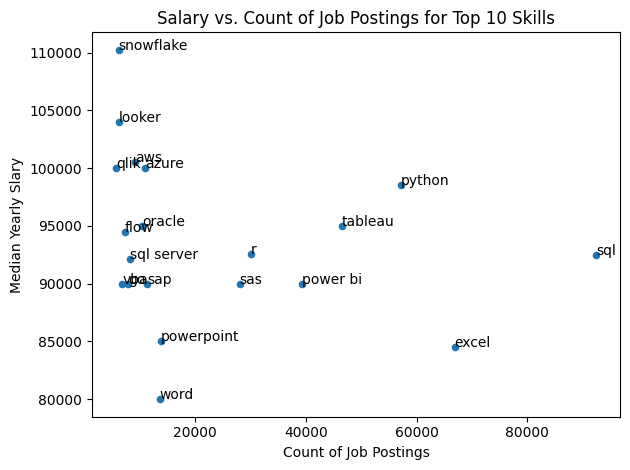

In [10]:
skills_stats.plot(kind ="scatter" ,x ="skill_count",y= "median_salary")
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Slary")
plt.title("Salary vs. Count of Job Postings for Top 10 Skills")
plt.tight_layout()
for i,text in enumerate(skills_stats.index):
    print(i,text)
    plt.text(skills_stats["skill_count"].iloc[i],skills_stats["median_salary"].iloc[i],text)
plt.show()

In [12]:
skills_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000
